# Computational Programming with Python
### Lecture : Object oriented programming


### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson, Robert Klöfkorn


# This lecture

- Last lecture
- Changing attributes
- Inheritance
- Objects that act like functions
- Class attributes, static and class methods

# Last lecture

We created a data type called `RationalNumber` using the keyword `class`. 

In the definition of methods, the variable `self` referred to the instance of the class. 

We defined an addition operator by using the special method `__add__`, and a reverse addition operator using `__radd__`.

We specified a string representation of an instance by using the special method `__repr__`.

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

## A rational number

In [2]:
class RationalNumber:
    def __init__(self, numerator, denominator): 
        if not isinstance(numerator, int) or not isinstance(denominator, int):
            raise TypeError("numerator and denominator must be integers.")
        self.numerator = numerator
        self.denominator = denominator
    def __add__(self, other):
        p1, q1 = self.numerator, self.denominator
        if isinstance(other, RationalNumber):
            p2, q2 = other.numerator, other.denominator
        elif isinstance(other, int):
            p2, q2 = other, 1
        else:
            raise TypeError("Wrong type!")
        return RationalNumber(p1*q2 + p2*q1, q1*q2)
    def __radd__(self, other):
        return self + other
    def __repr__(self):
        return f"{self.numerator}/{self.denominator}"
    
p = RationalNumber(1, 2)
q = RationalNumber(1, 3)
print(p+q)
print(1+p)

5/6
3/2


## Everything can be changed

By **default** all members in a Python class are **public**. Any member can be accessed from outside the class environment. Everything can be changed after creating an instance. 

In other programming languages such as C++ or Java there exist concepts for public, protected and private members in a class.

In [3]:
r = RationalNumber(2, 3)
print(r)
r.numerator = 23
r.name = 'my favorite fraction' # a new attribute
print(r)

2/3
23/3


We can even delete an attribute.

In [4]:
r = RationalNumber(2, 3)
del r.numerator
# print(r)  # error


## A similar class

Consider following class:



In [5]:
class SimplifiedFraction:
    # greatest_common_divisor = 0
    def __init__(self, num, denom): 
        greatest_common_divisor = gcd(num, denom) # using the numpy function gcd()
        self.num = int(num/greatest_common_divisor)
        self.denom = int(denom/greatest_common_divisor)
    
    def __repr__(self):
        return f"{self.num}/{self.denom}"
        # return str(self.num) + "/" + str(self.denom)
    
p = SimplifiedFraction(3, 12)
print("p =", p)

p.num = 2        # here the numerator is changed
print("p =", p)  # no longer a simplified fraction

p = 1/4
p = 2/4


## Changing attributes

We can __*protect*__ access to attributes. __*By convention*__ attributes that have a __*leading underscore*__ are meant for internal use only.

In [6]:
class SimplifiedFraction:
    def __init__(self, num, denom): 
        greatest_common_divisor = gcd(num, denom)  
        self._num = int(num/greatest_common_divisor)
        self._denom = int(denom/greatest_common_divisor)
    
    def __repr__(self):
        return f"{self._num}/{self._denom}"
    
p = SimplifiedFraction(3, 12)
# p = SimplifiedFraction.__init__(p,3,12)
print("p =", p)

p = 1/4


## Get and set

We can provide *getter* and *setter* methods to replace direct access.

In [7]:
class SimplifiedFraction:
    def __init__(self, num, denom): 
        greatest_common_divisor = gcd(num, denom)  
        self._num = int(num/greatest_common_divisor)
        self._denom = int(denom/greatest_common_divisor)
        
    def get_num(self):
        return self._num
    
    def set_num(self, new_num):
        self.__init__(new_num, self._denom)  # simplify the new fraction
    
    def __repr__(self):
        return f"{self._num}/{self._denom}"
    
p = SimplifiedFraction(3, 12)

print("p =", p)
print(p._num) # bad style, don't do it
print(p.get_num()) # good style, do it liek this

p.set_num(2)    # using the setter 
print("p =", p)

p = 1/4
1
1
p = 1/2


## A triangle example

![triangle](http://cmc.education/slides/notebookImages/triangle.svg)

## A class implementing a triangle

In [8]:
class Triangle:
    def __init__(self, A, B, C):
        self.A = array(A)
        self.B = array(B)
        self.C = array(C)
        self.a = self.C - self.B
        self.b = self.C - self.A
        self.c = self.B - self.A
    def area(self):
        return abs(cross(self.b, self.c))/2 # the numpy cross function
    
tr = Triangle([0, 0], [1, 0], [0, 1])
print("area =", tr.area())

area = 0.5


## The `cross` function

For vectors in $\mathbb{R}^3$, the cross product is returned.

In [9]:
a = array([1, 0, 0])
b = array([0, 1, 0])
print(cross(a, b))

[0 0 1]


For vectors in $\mathbb{R}^2$, the $z$ component is assumed to be zero, and the $z$ component of the  cross product is returned.

In [10]:
a = array([1, 0])
b = array([0, 1])
print(cross(a, b))

1


## Altering an attribute

In the triangle example, attributes depend on each other. Altering an attribute can cause data inconsistencies:

In [11]:
tr = Triangle([0, 0], [1, 0], [0, 1])
print("area =", tr.area())
tr.B = array([10, 0])
print("area =", tr.area())  # wrong area

area = 0.5
area = 0.5


## Using getter and setter methods for `B`

In [12]:
class Triangle:
    def __init__(self, A, B, C):
        self._A = array(A)
        self._B = array(B)
        self._C = array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(cross(self._b, self._c))/2
    def get_B(self):
        return self._B
    def set_B(self, B):
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
        # or simply use init again
        # self.__init__(self._A, B, self._C)

Now we can use the methods `get_B` and `set_B` to access the attribute `B`. 

In [13]:
tr = Triangle([0, 0], [1, 0], [0, 1])
tr.set_B(array([10, 0]))
print("area =", tr.area())  # correct area

area = 5.0


## The `property` command

We can bind the getter and setter methods to a property `B`. The property `B` is accessed directly but internally
the getter and setter methods will use the hidden attribute `_B`.

## Making a property `B`

In [14]:
class Stock(object):

    def __init__(self, stockName):

        # '_' is just a convention and does nothing
        self.__stockName  = stockName   # private now


    @property # when you do Stock.name, it will call this function
    def name(self):
        print("In the getter, __stockName is %s" % self.__stockName, file=sys.stderr)
        return self.__stockName

    @name.setter # when you do Stock.name = x, it will call this function
    def name(self, name):
        print("In the setter, name is %s will become %s" % ( self.__stockName, name), file=sys.stderr)
        self.__stockName = name


In [19]:
class Triangle:
    def __init__(self, A, B, C):
        self._A = array(A)
        self._B = array(B)
        self._C = array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(cross(self._b, self._c))/2
    def get_B(self):
        return self._B
    def set_B(self, B):
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
    B = property(fget=get_B, fset=set_B) # bind the getter and setter to B

Now it's safe to alter the value of B.

In [20]:
tr = Triangle([0, 0], [1, 0], [0, 1])
tr.B = array([10, 0])      # method set_B is used
print("area =", tr.area())
print(tr.B)                 # method get_B is used

area = 5.0
[10  0]


## A common mistake &hyphen; underscore forgotten

In [17]:
class Triangle:
    def __init__(self, A, B, C):
        self._A = array(A)
        self._B = array(B)
        self._C = array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(cross(self._b, self._c))/2
    def get_B(self):
        return self.B           # should be self._B otherwise we get a RecursionError
    def set_B(self, B):
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
    B = property(fget=get_B, fset=set_B)

What happens if we try to run:

In [18]:
tr = Triangle([0, 0], [1, 0], [0, 1])
print(tr.B) 

RecursionError: maximum recursion depth exceeded

## A triangle has three corners

Python allows us to delete an attribute. If so, we won't have a triangle any more. To prohibit deletion:

In [22]:
%%script python --no-raise-error
from numpy import *
class Triangle:
    def __init__(self, A, B, C):
        self._A = array(A)
        self._B = array(B)
        self._C = array(C)
        self._a = self._C - self._B
        self._b = self._C - self._A
        self._c = self._B - self._A
    def area(self):
        return abs(cross(self._b, self._c))/2
    def get_B(self):
        return self._B 
    def set_B(self, B):
        self._B = B
        self._a = self._C - self._B
        self._c = self._B - self._A
    def del_Pt(self):
        raise Exception("A triangle point cannot be deleted.")
    B = property(fget=get_B, fset=set_B, fdel=del_Pt)
    
tr = Triangle([0, 0], [1, 0], [0, 1])
del tr.B

Traceback (most recent call last):
  File "<stdin>", line 23, in <module>
  File "<stdin>", line 19, in del_Pt
Exception: A triangle point cannot be deleted.


# Inheritance

#### Example &hyphen; lines

A line can be defined by two points $A$ and $B$. 

We will define a parent class, or **base class**, `Line`.

Then we will define two child classes, or **derived classes**, `DashedLine` and `NonVerticalLine`.

To make a class that is a child class of som parent class, the parent class name is written inside parenthesis:

```python
class ChildClass(ParentClass):
    ...
```

## Defining the base class

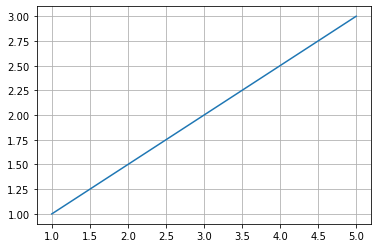

In [23]:
class Line:
    def __init__(self, A, B):
        self.A = array(A)
        self.B = array(B)   
    def plot(self):
        grid()
        plot([self.A[0], self.B[0]], [self.A[1], self.B[1]])
        
L = Line([1, 1], [5, 3])
L.plot()

## Defining a derived class `DashedLine`

A `DashedLine` inherits all data attributes and all methods from `Line` but the plot method is redefined, **overriding** the method of the base class.

dl.A = [1 1], dl.B = [5 3]


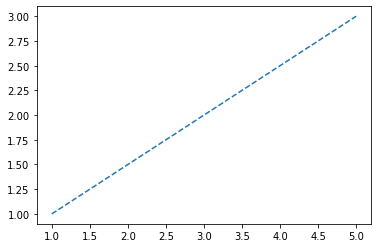

In [24]:
class DashedLine(Line):
    def plot(self):  # override the plot method
        plot([self.A[0], self.B[0]], [self.A[1], self.B[1]], '--')
        
dl = DashedLine([1, 1], [5, 3])  
print(f"dl.A = {dl.A}, dl.B = {dl.B}")
dl.plot()  

## Using `super()` 

We can make another derived class `NonVerticalLine`. It has the same attributes as `Line`, but also the attributes `slope` and `y_intercept`. 

To call the `__init__` method of the parent class, we refer to the parent class by using `super()`.

L.A = [-1 -1], L.B = [4 1], L.slope = 0.4, L.y_intercept = -0.6


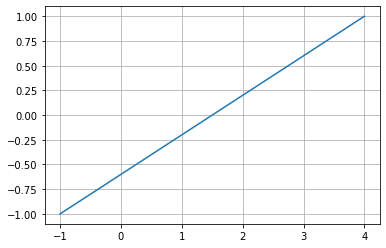

In [25]:
class NonVerticalLine(Line):
    def __init__(self, A, B):     # override the init method 
        super().__init__(A, B) 
        self.slope = (B[1]-A[1])/(B[0]-A[0]) # may raise a ZeroDivisionError
        self.y_intercept = A[1] - self.slope*A[0]
        
L = NonVerticalLine([-1, -1], [4, 1])
print(f"L.A = {L.A}, L.B = {L.B}, L.slope = {L.slope}, L.y_intercept = {L.y_intercept}")
L.plot()

## Adding a linear function as a method

We can add the function $f(x) = mx +c$, where $m$ is the slope and $c$ the $y$-intercept, as a method for the class `NonVerticalLine`.

In [26]:
class NonVerticalLine(Line):
    def __init__(self, A, B):
        super().__init__(A, B) 
        self.slope = (B[1]-A[1])/(B[0]-A[0])    
        self.y_intercept = A[1] - self.slope*A[0]
        
    def f(self, x):
        return self.slope*x + self.y_intercept
    
L = NonVerticalLine([0, 0], [2, 4])
print("f(100) =", L.f(100))

f(100) = 200.0


## `isinstance` and `issubclass`

A non-vertical line is also a line.

In [27]:
L = NonVerticalLine([1, 2], [2, 4])

print(isinstance(L, Line))
print(isinstance(L, NonVerticalLine))
print(isinstance(L, DashedLine))

True
True
False


We can check if a class is a derived class of another class

In [28]:
print(issubclass(NonVerticalLine, Line))  # NonVerticalLine is a subclass of Line
print(issubclass(Line, NonVerticalLine))  # Line is not a subclass of NonVerticalLine

True
False


# Objects that act like functions

Recall that the `quad` function can only be used on functions with **one** single parameter. 

In [29]:
from scipy.integrate import quad

def f(x):
    return 2*sin(0.5*x)

def g(x, A, omega):
    return A*sin(omega*x)

a = quad(f, 0, pi) # works
print(a)

# b = quad(g, 0, pi) # doesn't work

(3.9999999999999996, 4.4408920985006255e-14)


## Objects that act like functions (cont)

We can make a class that has a `value` method corresponding to a function value.

In [30]:
class Sin:
    def __init__(self, A, omega):
        self.A = A
        self.omega = omega
    
    def value(self, x):
        return self.A*sin(self.omega*x)
    
    def __repr__(self):
        return f"{self.A}*sin({self.omega}x)"
    
sin1 = Sin(1, 1)
sin2 = Sin(2, 0.5)
print(sin1)
print(sin2)

a = quad(sin1.value, 0, pi)
b = quad(sin2.value, 0, pi)

print(a)
print(b)

1*sin(1x)
2*sin(0.5x)
(2.0, 2.220446049250313e-14)
(3.9999999999999996, 4.4408920985006255e-14)


## The special method `__call__`

Using `__call__`, we can call an instance just like we would call a function.

In [32]:
from numpy import *
from scipy.integrate import quad
class Sin:
    def __init__(self, A, omega):
        self.A = A
        self.omega = omega
    
    def __call__(self, x):  # easier to use than the previous value method 
        return self.A*sin(self.omega*x)
    
    def __repr__(self):
        return f"{self.A}*sin({self.omega}x)"
    
sin1 = Sin(1, 1)
sin2 = Sin(2, 0.5)
print(sin1(pi/2))   # print sin at position pi/2, here __call__ is executed
print(sin2(pi))

a = quad(sin1, 0, pi)  # sin1.__call__ is used
b = quad(sin2, 0, pi)

print(a)
print(b)

1.0
2.0
(2.0, 2.220446049250313e-14)
(3.9999999999999996, 4.4408920985006255e-14)


## Arithmetic operators for functions

In mathematics we can add functions.

$$
f(x) = \sin(x) \\
g(x) = \cos(x) \\
h(x) = f(x) + g(x)
$$

In Python this is not directly possible:

In [33]:
%%script python --no-raise-error
from numpy import *
f = sin
g = cos
h = f + g  # error

Traceback (most recent call last):
  File "<stdin>", line 4, in <module>
TypeError: unsupported operand type(s) for +: 'numpy.ufunc' and 'numpy.ufunc'


With the concept of classes, we can program an elegant work-around.

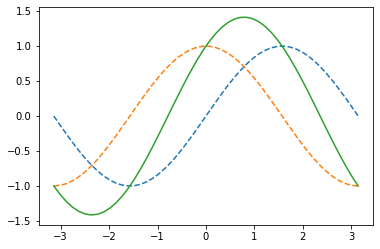

In [34]:
class Function:                 # encapsulate a function
    def __init__(self, f):
        self.f = f 
    def __call__(self, x):
        return self.f(x)
    def __add__(self, g):
        def sum(x):
            return self(x)+g(x)
        return type(self)(sum)  # return an instance of the same class
    
f = Function(sin)
g = Function(cos)
h = f + g
x = linspace(-pi, pi)
plot(x, f(x), '--', x, g(x), '--', x, h(x))

# Class attributes, static and class methods

In following class, `nr_of_fractions` is a **class data attribute**, `num` and `denom` are **instance data attributes**.

In [36]:
class SimplifiedFraction:
    nr_of_fractions = 0  # class attribute, or static attribute
    
    def __init__(self, num, denom): 
        greatest_common_divisor = gcd(num, denom)
        self.num = int(num/greatest_common_divisor)
        self.denom = int(denom/greatest_common_divisor)
        SimplifiedFraction.nr_of_fractions += 1    # changing the class attribute
    
    def __repr__(self):
        return f"{self.num}/{self.denom}"

print(SimplifiedFraction.nr_of_fractions)  # using the class attribute
p = SimplifiedFraction(2, 5)
q = SimplifiedFraction(4, 12)
print(q.nr_of_fractions)        # using the class attribute
print(p.nr_of_fractions)        # which is the same for both instances 
print(q.num)  
print(p.num)  # different for each instance

0
2
2
1
2


## Making a static method

Instead of using the numpy gcd function, we could write one using Euclid's algorithm:

In [37]:
def my_gcd(a, b):
    while b != 0:
        print(f"{a} = {a//b}*{b} + {a%b}")
        a, b = b, a%b
    return a

print(my_gcd(120, 25))
print(20*"-")
print(my_gcd(25, 120))     

120 = 4*25 + 20
25 = 1*20 + 5
20 = 4*5 + 0
5
--------------------
25 = 0*120 + 25
120 = 4*25 + 20
25 = 1*20 + 5
20 = 4*5 + 0
5


## Making a static method (cont)

In following class, `gcd` is a **static method**. It is in the namespace of `SimplifiedFraction`.

In [39]:
class SimplifiedFraction:
    
    @staticmethod           # a decorator to make it a static method
    def gcd(a, b):  
        while b != 0:
            a, b = b, a%b
        return a 
    
    def __init__(self, num, denom): 
        greatest_common_divisor = SimplifiedFraction.gcd(num, denom)
        self.num = int(num/greatest_common_divisor)
        self.denom = int(denom/greatest_common_divisor)
    
    #def gcd2(self, a, b):
    #    return gcd(a,b)
    
    def __repr__(self):
        return f"{self.num}/{self.denom}"
     
print(SimplifiedFraction.gcd(120, 25))  # calling the static method inside the class namespace

r = SimplifiedFraction(2, 3)
print(r.gcd(4, 5))                      # calling the static method by accessing the instance


5
1


## Making a class method

A vertical line can be defined by one point only. We could add a method for making a vertical line.

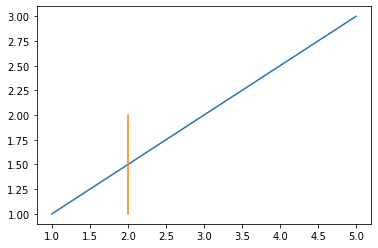

In [40]:
class Line:
    # clsVar = 1
    def __init__(self, A, B):
        self.A = array(A)
        self.B = array(B)   
    def plot(self):
        grid()
        plot([self.A[0], self.B[0]], [self.A[1], self.B[1]])
        
    @classmethod
    def make_vertical_line(cls, A):  # the parameter cls refers to the class Line
        # cls.clsVar += 1
        B = array([A[0], A[1]+1])
        return cls(A, B)
        
L1 = Line([1, 1], [5, 3])
L2 = Line.make_vertical_line([2, 1])
L1.plot()
L2.plot()

## Summary methods

- Instance methods needs an object and can access the object through a parameter `self`.
- Class methods are in the namespace of a class and can access the class through a parameter `cls`.
- Static methods are in the namespace of a class but cannot access either the class or an instance.

The words `self` and `cls` are not reserved words but conventions.